<a href="https://colab.research.google.com/github/tahminahasan/Workflow-ML/blob/main/BoxCox_YeoJohnson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Power Transformer | Box - Cox Transform | Yeo - Johnson Transform

🔌 PowerTransformer (from sklearn)
A scikit-learn tool that applies power transforms to make data more Gaussian (normal).

Supports two methods: Box-Cox and Yeo-Johnson.

Automatically standardizes the output (zero mean, unit variance).

📦 Box-Cox Transform
Only works for positive data (> 0).

Makes skewed data more normally distributed.

Formula involves raising the data to a power λ (lambda).

Often improves performance for models that assume normality (e.g. Linear Regression).

🔁 Yeo-Johnson Transform
A generalization of Box-Cox.

Works with both positive and negative values.

Automatically chooses the best λ (lambda) for each feature.

More flexible, safer for datasets with zeros or negatives.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats  # Statistical functions and tests

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score                    # Regression performance metric
from sklearn.preprocessing import PowerTransformer     # Feature scaling/normalization

In [5]:
df=pd.read_csv("concrete_data.csv")
df.head(3)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [6]:
df.shape

(1030, 9)

In [7]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [9]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
# Separate features (X) by dropping the target column 'Strength' from the dataframe
X = df.drop(columns=['Strength'])

# Select the target variable (y) as the last column of the dataframe
y = df.iloc[:, -1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
# Applying Regression without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.627553179231485

In [13]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

np.float64(0.46099404916628606)

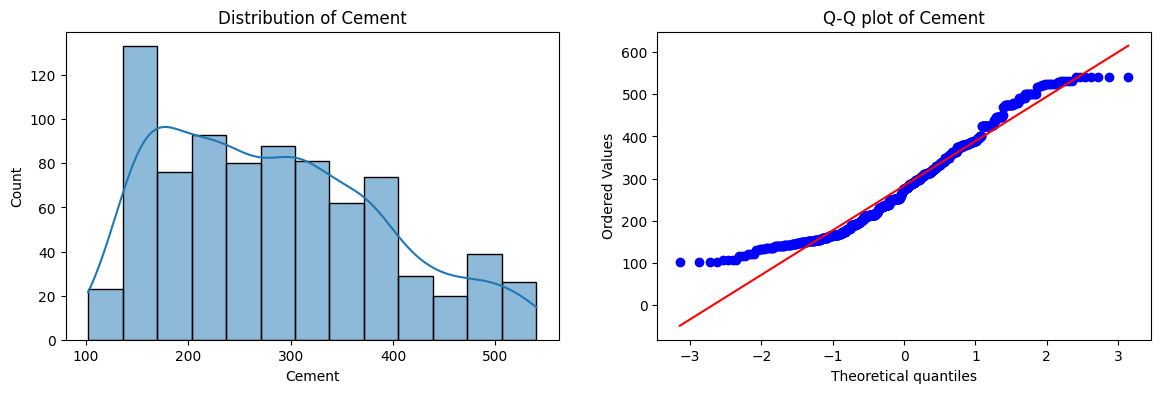

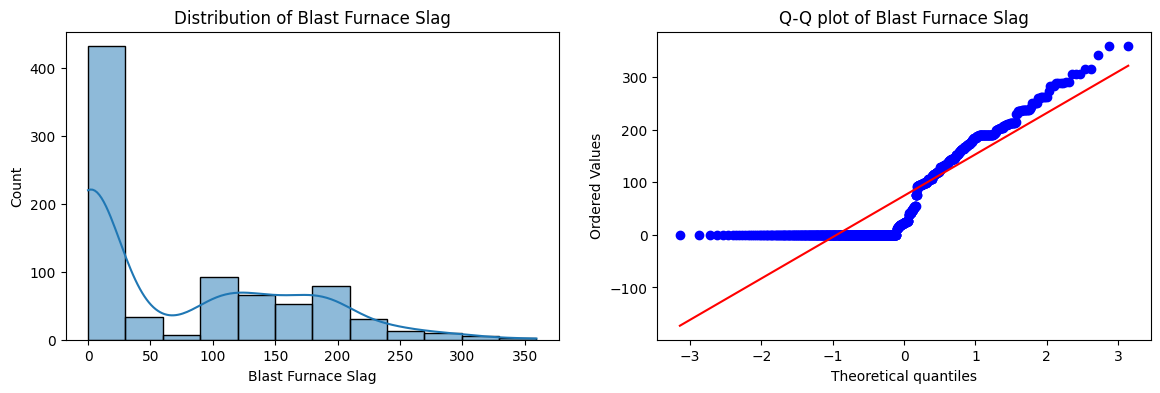

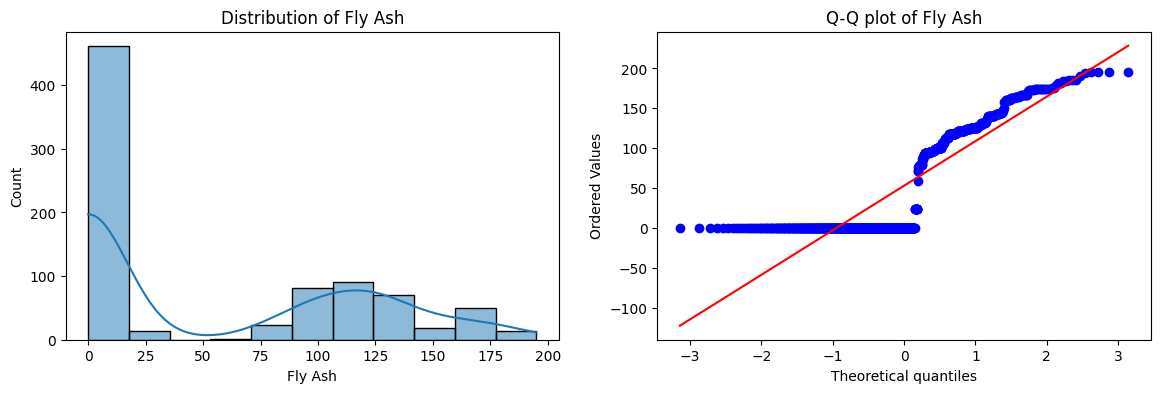

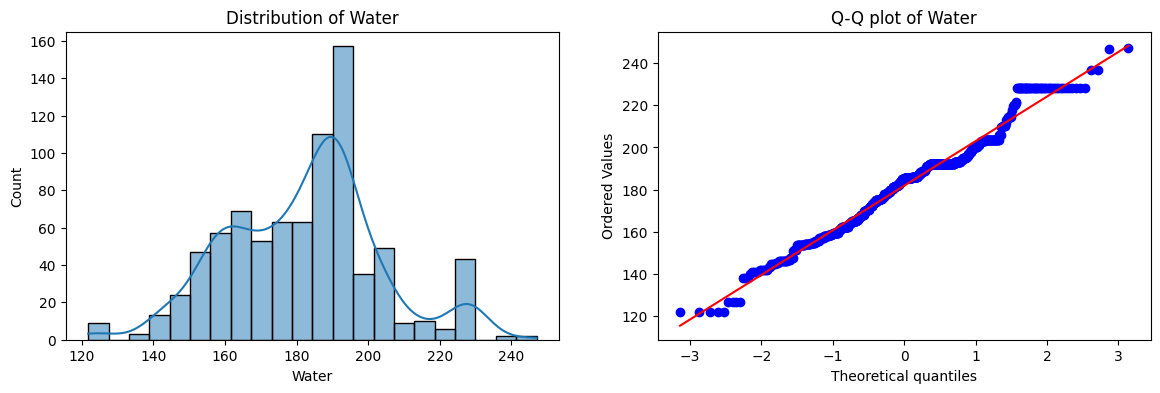

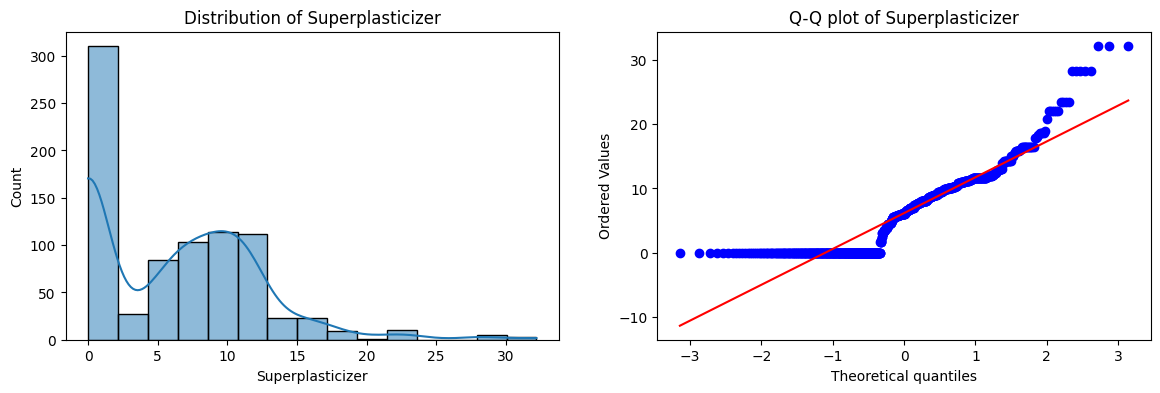

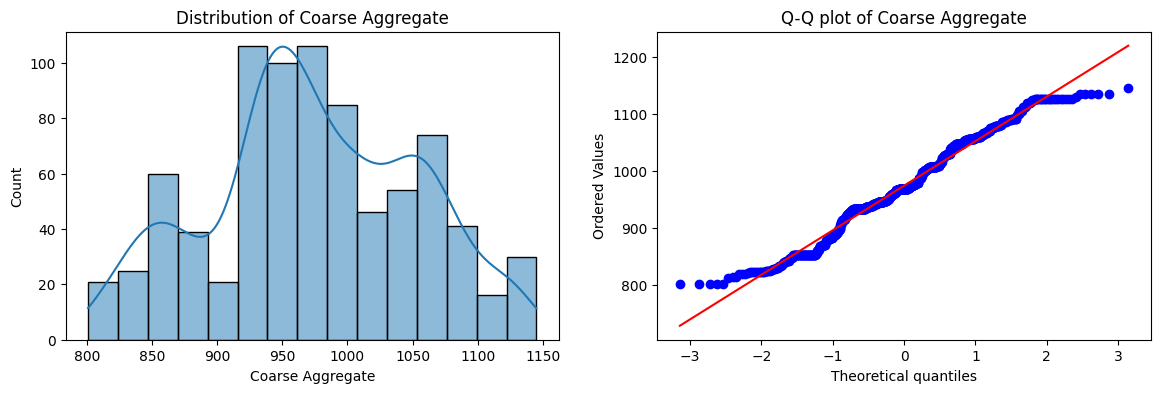

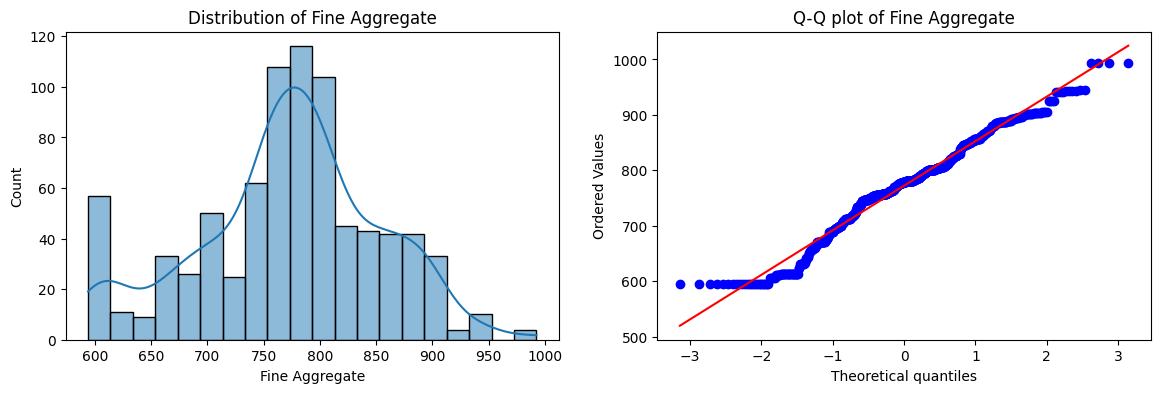

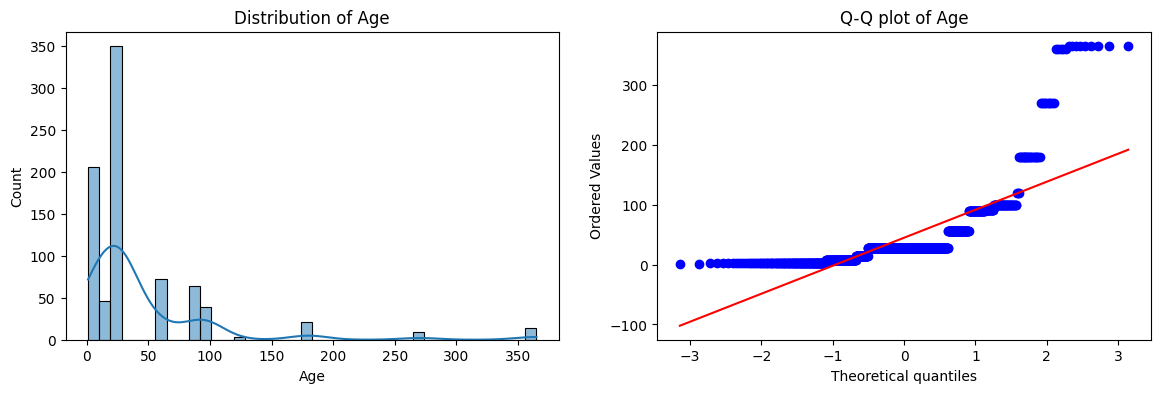

In [16]:
# Plot distribution and Q-Q plots for each feature in X_train
# using seaborn's histplot with KDE (kernel density estimate)

for col in X_train.columns:
    plt.figure(figsize=(14,4))

    # subplot(121): 1 row, 2 columns, 1st plot (left)
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')

    # subplot(122): 1 row, 2 columns, 2nd plot (right)
    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {col}')

    plt.show()


In [17]:
# Applying Box-Cox transformation to make features more normally distributed
# Box-Cox requires all input data to be positive, so we add a small constant (0.000001) to avoid zero or negative values

pt = PowerTransformer(method='box-cox')

# Fit the transformer on training data and apply transformation
X_train_transformed = pt.fit_transform(X_train + 0.000001)

# Apply the same transformation on test data
X_test_transformed = pt.transform(X_test + 0.000001)

# Create a DataFrame showing each feature and its corresponding Box-Cox lambda parameter
pd.DataFrame({'cols': X_train.columns, 'box_cox_lambdas': pt.lambdas_})


,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [18]:
# Applying Linear Regression on Box-Cox transformed data

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model using the transformed training data
lr.fit(X_train_transformed, y_train)

# Predict target values on the transformed test data
y_pred2 = lr.predict(X_test_transformed)

# Evaluate model performance using R2 score
r2_score(y_test, y_pred2)


0.8047825011028631

In [19]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

np.float64(0.6658537934164657)

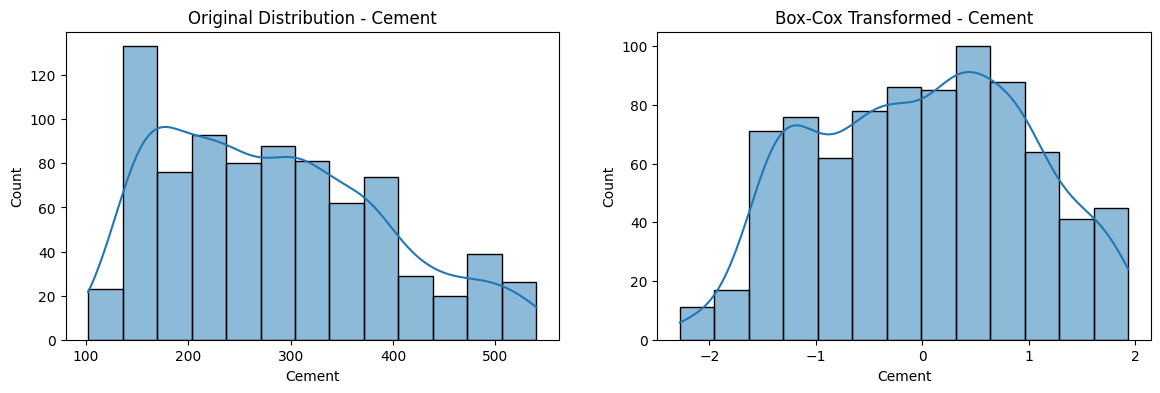

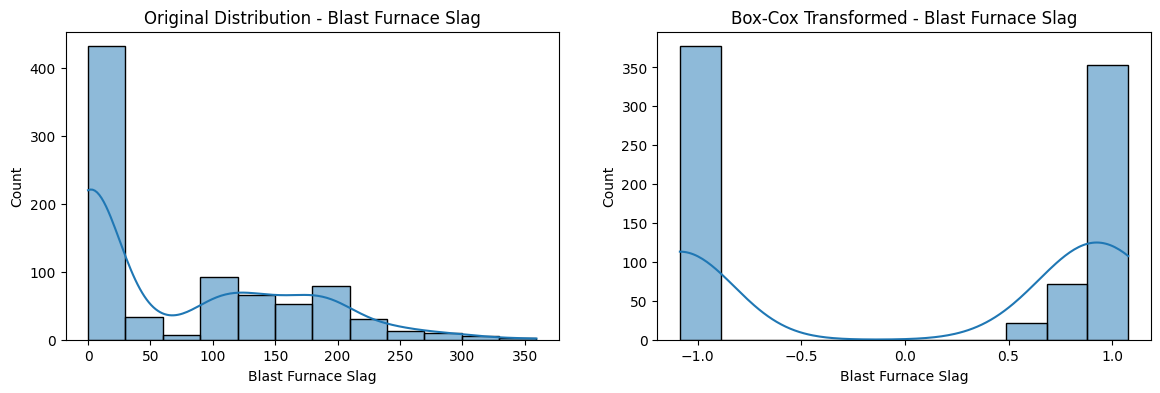

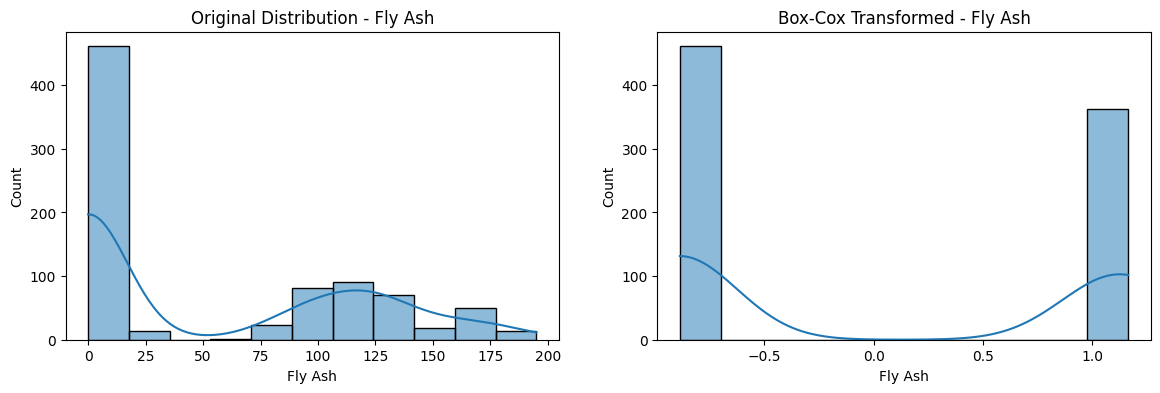

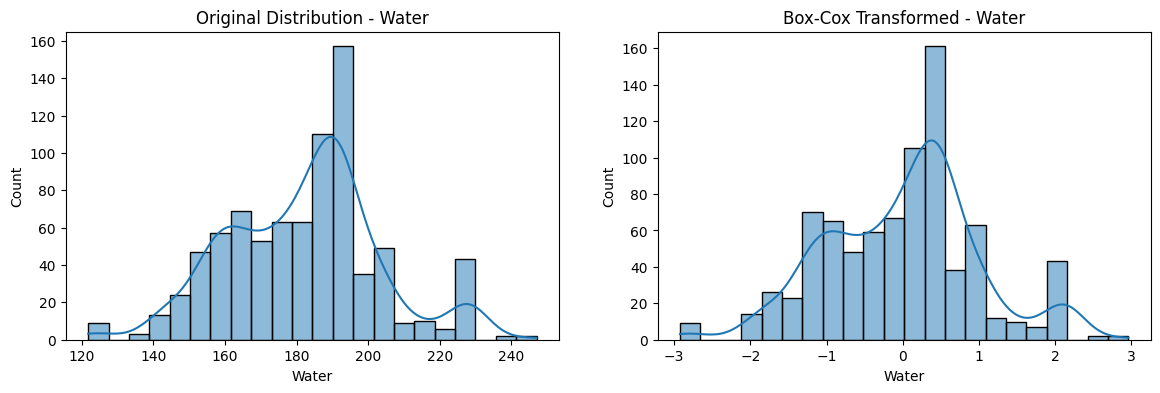

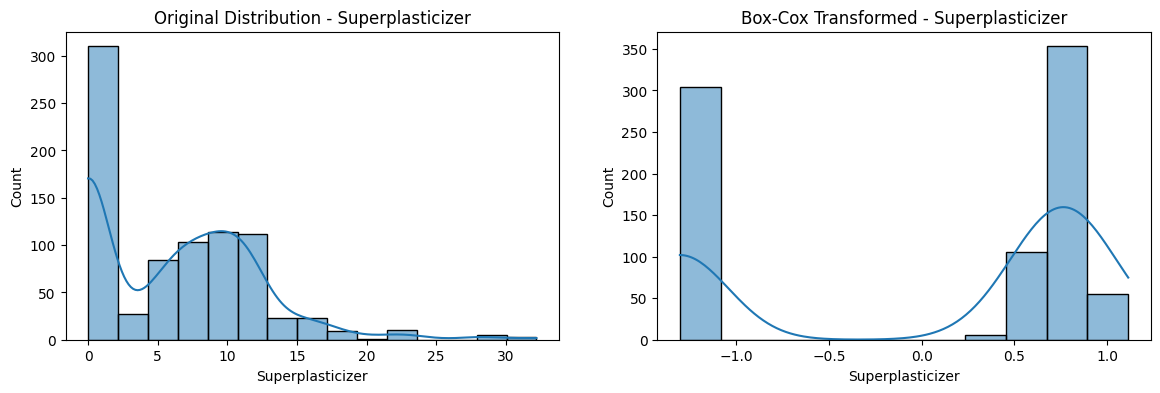

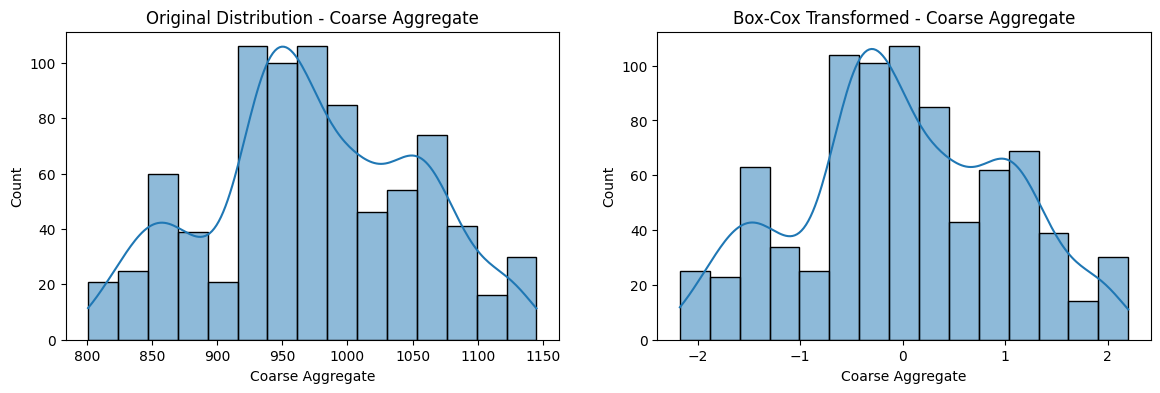

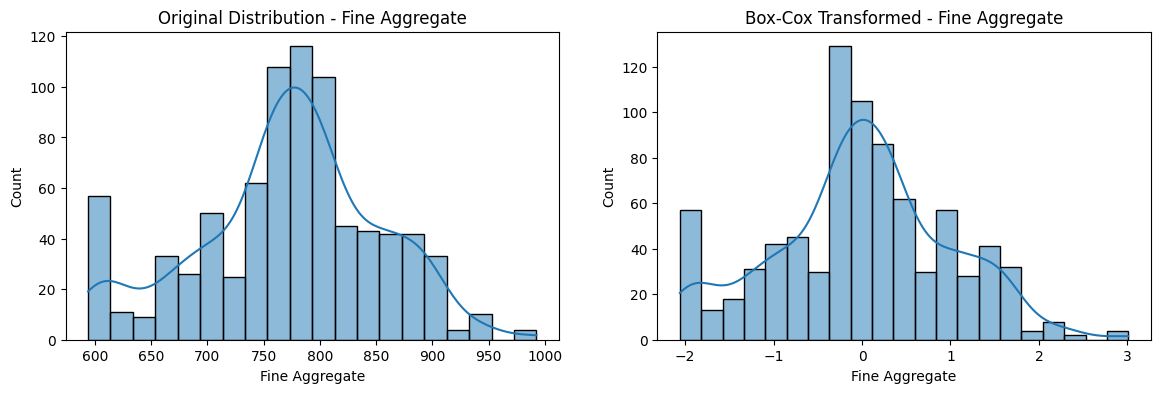

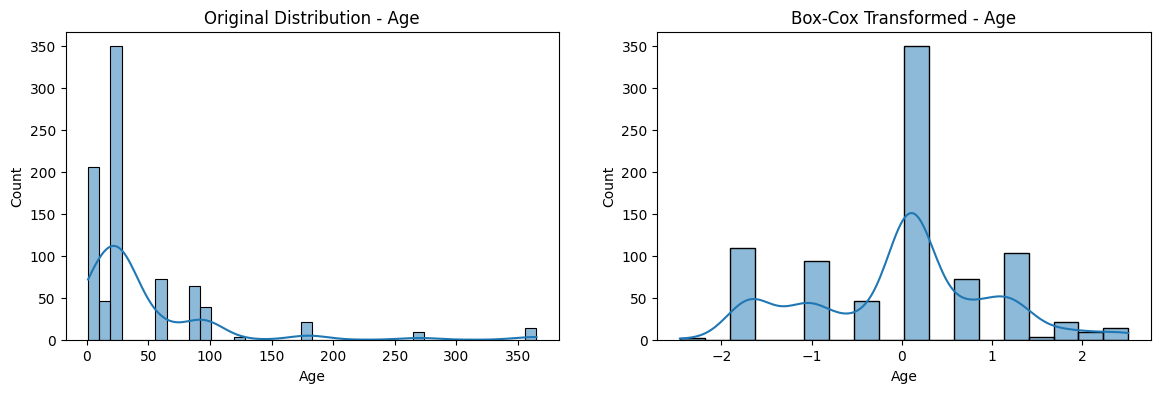

In [20]:
# Before and after comparison of feature distributions for Box-Cox transformation

# Convert the transformed NumPy array back to a DataFrame with original column names
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

# Plot original vs. Box-Cox transformed distributions for each feature
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))

    # Left plot: original feature distribution
    plt.subplot(121)  # 1 row, 2 columns, 1st plot
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Original Distribution - {col}')

    # Right plot: transformed feature distribution
    plt.subplot(122)  # 1 row, 2 columns, 2nd plot
    sns.histplot(X_train_transformed[col], kde=True)
    plt.title(f'Box-Cox Transformed - {col}')

    plt.show()


In [21]:
# Apply Yeo-Johnson transformation (handles both positive and negative values)

pt1 = PowerTransformer()  # default method='yeo-johnson'

# Fit and transform the training data
X_train_transformed2 = pt1.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_transformed2 = pt1.transform(X_test)

# Train Linear Regression on the Yeo-Johnson transformed data
lr = LinearRegression()
lr.fit(X_train_transformed2, y_train)

# Predict on the transformed test set
y_pred3 = lr.predict(X_test_transformed2)

# Evaluate the model using R2 score
print(r2_score(y_test, y_pred3))

# Display the lambda values used for Yeo-Johnson transformation for each feature
pd.DataFrame({'cols': X_train.columns, 'Yeo_Johnson_lambdas': pt1.lambdas_})


0.8161906512004999


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [22]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

np.float64(0.6834625141500866)

In [23]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

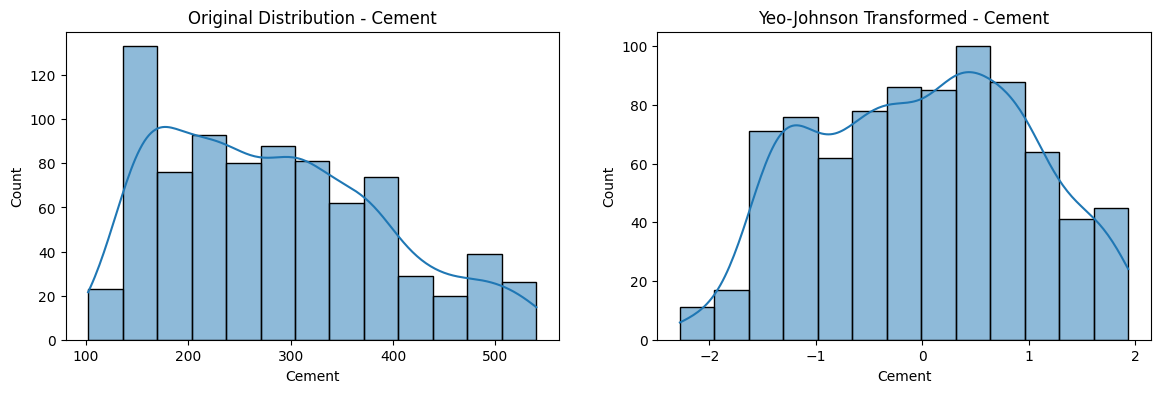

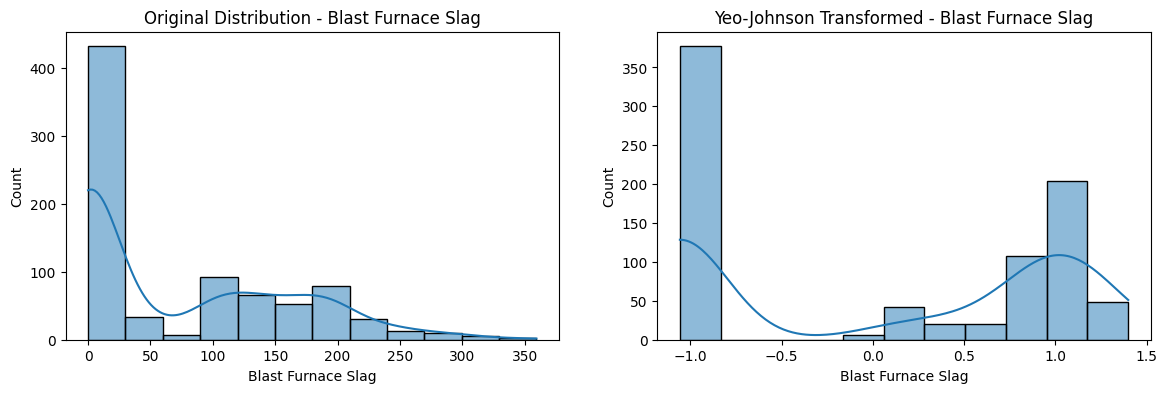

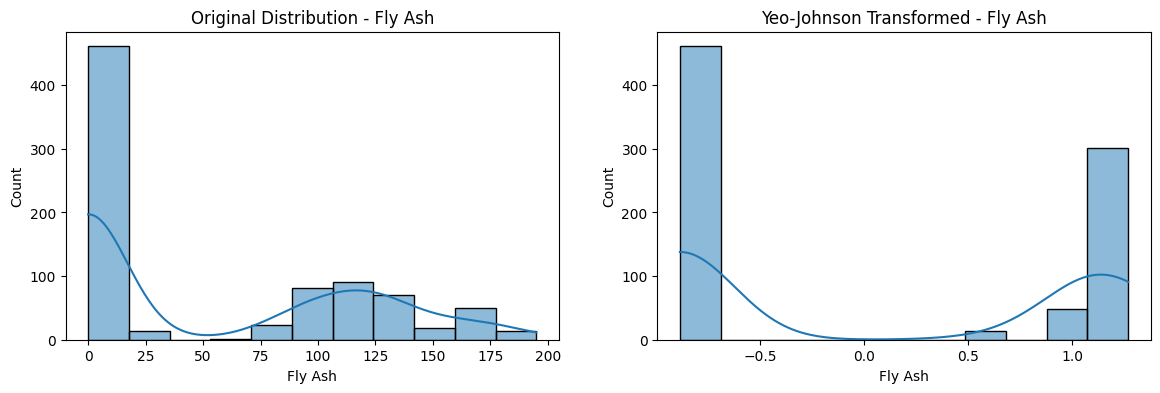

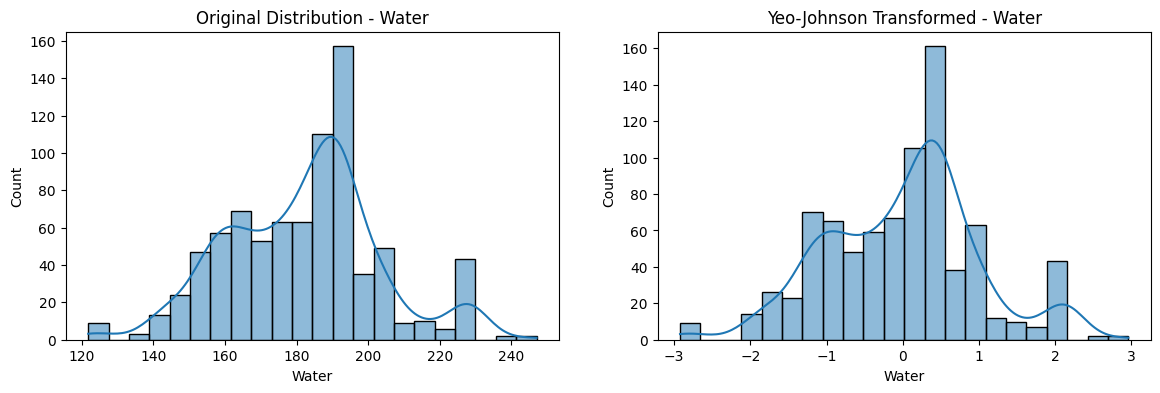

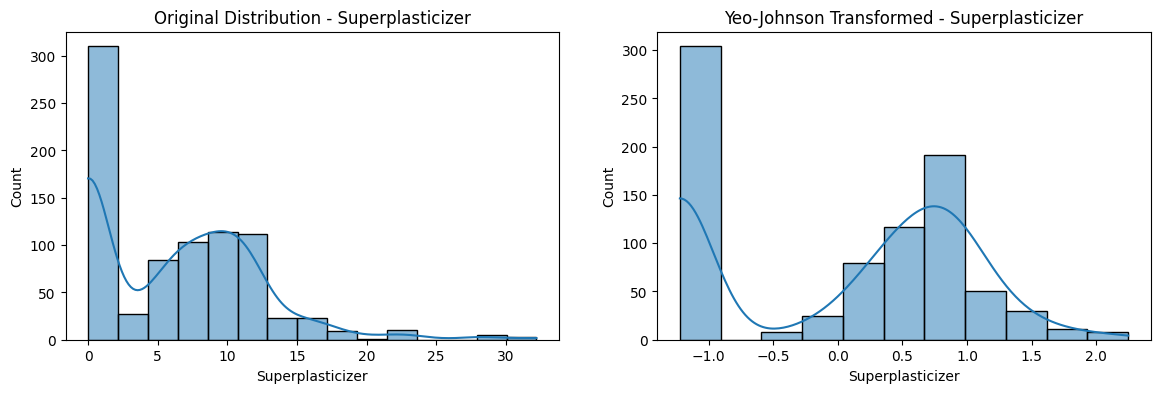

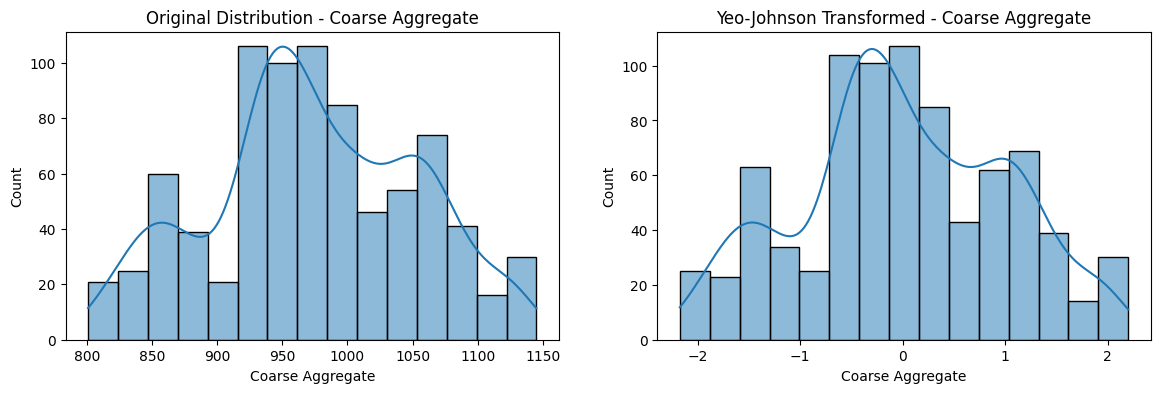

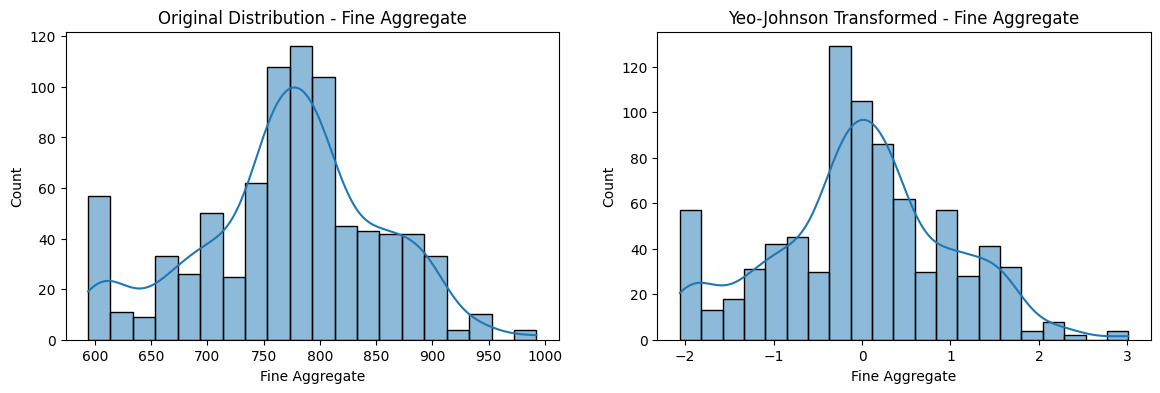

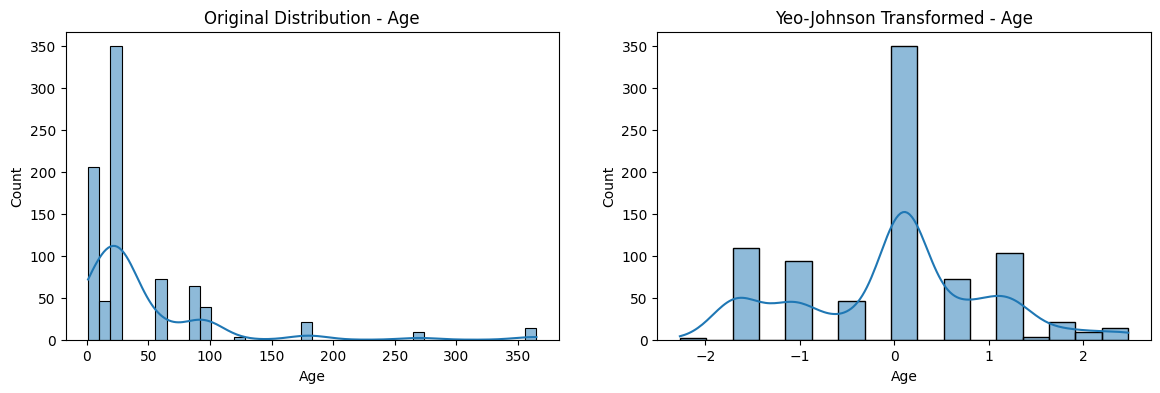

In [24]:
# Before and after comparison of feature distributions for Yeo-Johnson transformation

# Convert the transformed NumPy array back to a DataFrame with original column names
X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns=X_train.columns)

# Plot original vs. Yeo-Johnson transformed distributions for each feature
for col in X_train.columns:
    plt.figure(figsize=(14,4))

    # Original feature distribution
    plt.subplot(121)  # 1 row, 2 columns, 1st plot
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Original Distribution - {col}')

    # Transformed feature distribution
    plt.subplot(122)  # 1 row, 2 columns, 2nd plot
    sns.histplot(X_train_transformed2[col], kde=True)
    plt.title(f'Yeo-Johnson Transformed - {col}')

    plt.show()


In [25]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885
